# **6. Объединение DataFrame: concat**

Следуя нашему плану объединения таблиц, первым делом мы должны склеить таблицы ratings1 и ratings2 по строкам.

Для этого воспользуемся встроенной функцией Pandas concat(), которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.

Кликните на плашку, чтобы увидеть информацию ↓

Основные параметры функции concat()

objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;

axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;

join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;

ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.

Итак, давайте склеим  ratings1 и ratings2 по строкам, так как они имеют одинаковую структуру столбцов. Для этого передадим их списком в функцию concat(). Помним, что параметр axis по умолчанию равен 0, объединение происходит по строкам, поэтому не трогаем его. 

Примечание. Обратите внимание, что concat является функцией библиотеки, а не методом DataFrame. Поэтому её вызов осуществляется как pd.concat(...).

In [ ]:
ratings = pd.concat([ratings1, ratings2])
display(ratings)

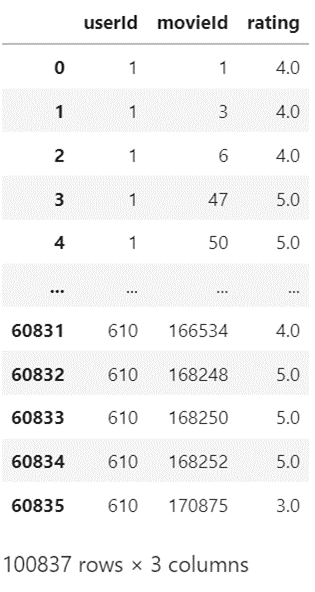

В результате мы увеличили первую таблицу, добавив снизу строки второй таблицы.

На первый взгляд может показаться, что всё прошло успешно, однако если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

Это связано с тем, что по умолчанию concat сохраняет первоначальные индексы объединяемых таблиц, а обе наши таблицы индексировались, начиная от 0. Чтобы создать новые индексы, нужно выставить параметр ignore_index на True:
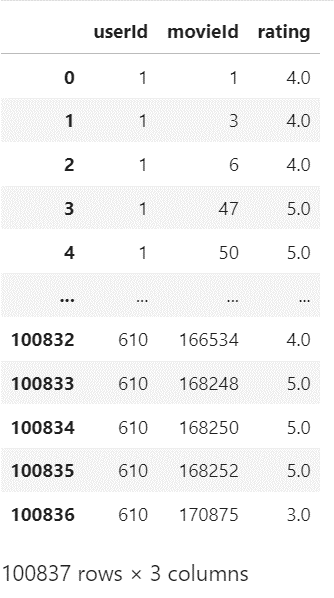

In [ ]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

Казалось бы, совсем другое дело! Но это ещё не всё. Давайте узнаем количество строк в таблицах ratings и dates, ведь нам предстоит вертикально склеить их между собой:

In [ ]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

# Число строк в таблице ratings: 100837
# Число строк в таблице dates: 100836
# False

?
Размерность таблиц разная — как такое могло произойти?

На самом деле очень просто: при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [ ]:
display(ratings1.tail(1))
display(ratings2.head(1))

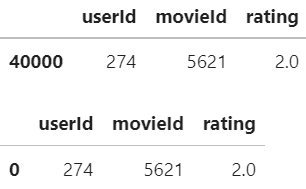


Чтобы очистить таблицу от дублей, мы можем воспользоваться методом DataFrame drop_duplicates(), который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр ignore_index в методе drop_duplicates() на значение True:

In [ ]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])
# Число строк в таблице ratings: 100836

Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы ratings и dates по столбцам:

In [ ]:
ratings_dates = pd.concat([ratings, dates], axis=1)
display(ratings_dates.tail(7))

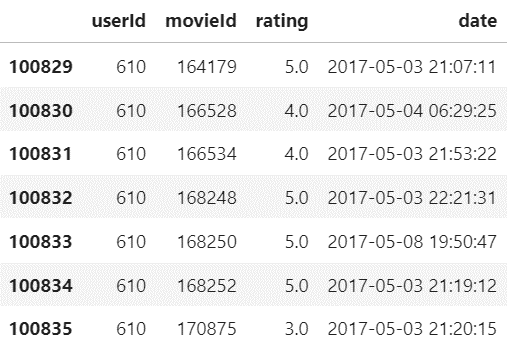

✍ Итак, мы смогли создать единую таблицу с рейтингами и датами их представления. Нашим следующим шагом будет присоединить к таблице информацию о фильмах из таблицы movies.

А пока предлагаем вам потренироваться в использовании функции concat() ↓

*Задание 6.1*

Какой параметр функции concat позволяет управлять способом конкатенации (проводить конкатенацию по строкам или по столбцам)?

(axis)

Чтобы управлять способом конкатенации таблиц, используется параметр axis. Если axis=0, конкатенация идёт по строкам, если axis=1 — по столбцам.

*Задание 6.2*

Заданы две таблицы — df1 и df2. В первой содержатся имена и фамилии сотрудников, во второй — их должности.

В данном случае верным способом будет конкатенация таблиц по столбцам. Для этого значение параметра axis выставляется на 1.


df = pd.concat([df1, df2], axis=1)

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df1 = pd.DataFrame({"Name": ["Pankaj", "Lisa"], "Surname": ["Sobolev", "Krasnova"]})
df2 = pd.DataFrame({"Role": ["Admin", "Editor"]})
df = pd.concat([df1, df2], axis=1)

*Задание 6.3*

В ваше распоряжение предоставлена директория users ('./Root/users'). В данной директории содержатся csv-файлы, в каждом из которых хранится информация об идентификаторах пользователей (user_id) и ссылки на их фотографии (image_url). Файлов в директории может быть сколько угодно.

Вам необходимо написать функцию concat_user_files(path), параметром которой является path — путь до директории. Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его.

Список названий всех файлов, находящихся в директории, вы можете получить с помощью функции os.listdir(path) из модуля os. Отсортируйте полученный список, прежде чем производить объединение файлов.

Обратите внимание, что метод os.listdir() возвращает только названия файлов в указанной директории, а при чтении файла необходимо указывать полный путь до него.

Не забудьте обновить индексы результирующей таблицы после объединения.

Примечание. Учтите, что на тестовом наборе файлов в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться.

Например, для директории users/ результирующая таблица должна иметь следующий вид:
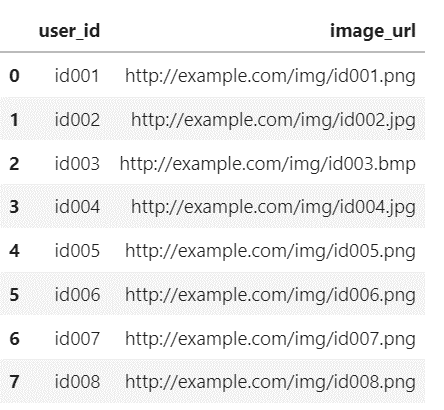



In [6]:
import pandas as pd

In [7]:
import os

In [8]:
def concat_user_files(path):
    file_list = os.listdir(path)
    file_list.sort()
    result_df=pd.read_csv(path+'/'+file_list[0])
    for index in range(1,len(file_list)):
        temp_df = pd.read_csv(path + '/' + file_list[index])
        result_df = pd.concat([result_df, temp_df],ignore_index=True)
    result_df = result_df.drop_duplicates(ignore_index=True)
    return result_df
